# This is Prof. Richmond's HW#1 for Exoplanets Class (2016/10)
http://spiff.rit.edu/classes/resceu/homework/hw1.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [10]:
import urllib.request

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
req = urllib.request.Request(url)
with urllib.request.urlopen(req) as response:
   html = response.read()

outpath = 'confirmed_planets_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("retrieving URL: {}".format(url))

with open(outpath,'wb') as f:
     f.write(html)
print("created file: {}".format(outpath))

retrieving URL: http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
created file: confirmed_planets_20161010.csv


Let's check the downloaded file.

In [9]:
html[:100]

b'pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_or'

Or better yet, parse into table using pandas: 

In [12]:
import pandas as pd
df = pd.read_csv(outpath)
df.head()

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,...,st_massblend,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,st_radn,pl_nnotes,rowupdate
0,HD 17156,b,Radial Velocity,1,21.21663,0.00045,-0.00045,0.0,4,0.1614,...,0.0,5,1.44,0.08,-0.08,0.0,0.0,5,0,2014-10-29
1,HD 18742,b,Radial Velocity,1,772.00000,11.00000,-11.00000,0.0,1,1.9200,...,0.0,3,4.90,0.10,-0.10,0.0,0.0,2,0,2014-05-14
2,HD 20794,b,Radial Velocity,3,18.31500,0.00800,-0.00800,0.0,1,0.1207,...,0.0,5,NaN,NaN,NaN,NaN,0.0,2,0,2015-08-27
3,HD 20794,d,Radial Velocity,3,90.30900,0.18400,-0.18400,0.0,1,0.3499,...,0.0,5,NaN,NaN,NaN,NaN,0.0,2,0,2015-08-27
4,HD 20782,b,Radial Velocity,1,597.06500,0.04300,-0.04300,0.0,3,1.3970,...,0.0,5,1.09,0.04,-0.04,0.0,0.0,3,0,2016-05-19


Alternatively, we can use the downloaded csv as an input file. However, we need to manually include planet's discovery year (pl_disc) in the NASA database and then manually download. I've done it and saved as planets_raw.csv after removing manually the #headers above. So we will use this file instead.

In [18]:
#filename = 'confirmed_planets_20161010.csv'
filename = 'planets_raw.csv'

import pandas as pd
df = pd.read_csv(filename,delimiter=',')
df.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumblend,st_dens,st_denserr1,st_denserr2,st_denslim,st_metratio,st_age,st_ageerr1,st_ageerr2,st_agelim
0,3394,xi Aql,b,Radial Velocity,1,136.750000,0.250000,-0.250000,0.0,0.680000,...,0.0,NaN,NaN,NaN,NaN,[Fe/H],NaN,NaN,NaN,0.0
1,3391,ups And,b,Radial Velocity,3,4.617033,0.000023,-0.000023,0.0,0.059222,...,0.0,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,0.0
2,3392,ups And,c,Radial Velocity,3,241.258000,0.064000,-0.064000,0.0,0.827774,...,0.0,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,0.0
3,3393,ups And,d,Radial Velocity,3,1276.460000,0.570000,-0.570000,0.0,2.513290,...,0.0,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,0.0
4,3390,tau Gem,b,Radial Velocity,1,305.500000,0.100000,-0.100000,0.0,1.170000,...,NaN,NaN,NaN,NaN,NaN,[Fe/H],1.22,0.76,-0.76,0.0


# 1. Pick 2 methods by which exoplanets can be discovered. Make a graph showing the number of planets discovered by each method over the period 1995 - 2015.

In [19]:
df.columns

Index(['rowid', 'pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_pnum',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
       'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'pl_ttvflag',
       'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str',
       'dec', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim',
       'st_optmag', 'st_optmagerr', 'st_optmaglim', 'st_optmagblend',
       'st_optband', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_teffblend', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_massblend', 'st_rad', 'st_rade

In [20]:
set(df['pl_discmethod']) #planet discovery method

{'Astrometry',
 'Eclipse Timing Variations',
 'Imaging',
 'Microlensing',
 'Orbital Brightness Modulation',
 'Pulsar Timing',
 'Pulsation Timing Variations',
 'Radial Velocity',
 'Transit',
 'Transit Timing Variations'}

I'll pick Transit and RV methods.

In [21]:
idx1 = df['pl_discmethod'] == 'Transit'
df_transit = df[idx1]

idx2 = df['pl_discmethod'] == 'Radial Velocity'
df_RV = df[idx2]

In [22]:
df_transit.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumblend,st_dens,st_denserr1,st_denserr2,st_denslim,st_metratio,st_age,st_ageerr1,st_ageerr2,st_agelim
25,3369,XO-5,b,Transit,1,4.187756,6.000000e-07,-6.000000e-07,0.0,0.05150,...,0.0,1.01,0.06,-0.06,0.0,[Fe/H],NaN,NaN,NaN,0.0
26,3368,XO-4,b,Transit,1,4.125083,4.000000e-06,-4.000000e-06,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,[Fe/H],2.1,0.6,-0.6,0.0
27,3367,XO-3,b,Transit,1,3.191524,6.800000e-06,-6.800000e-06,0.0,0.04540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,3364,XO-2 N,b,Transit,1,2.615859,2.800000e-07,-2.800000e-07,0.0,0.03673,...,0.0,NaN,NaN,NaN,NaN,[Fe/H],7.9,2.3,-3.0,0.0
31,3363,XO-1,b,Transit,1,3.941507,2.020000e-06,-2.020000e-06,0.0,0.04900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_RV.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumblend,st_dens,st_denserr1,st_denserr2,st_denslim,st_metratio,st_age,st_ageerr1,st_ageerr2,st_agelim
0,3394,xi Aql,b,Radial Velocity,1,136.750000,0.250000,-0.250000,0.0,0.680000,...,0.0,NaN,NaN,NaN,NaN,[Fe/H],NaN,NaN,NaN,0.0
1,3391,ups And,b,Radial Velocity,3,4.617033,0.000023,-0.000023,0.0,0.059222,...,0.0,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,0.0
2,3392,ups And,c,Radial Velocity,3,241.258000,0.064000,-0.064000,0.0,0.827774,...,0.0,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,0.0
3,3393,ups And,d,Radial Velocity,3,1276.460000,0.570000,-0.570000,0.0,2.513290,...,0.0,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,0.0
4,3390,tau Gem,b,Radial Velocity,1,305.500000,0.100000,-0.100000,0.0,1.170000,...,NaN,NaN,NaN,NaN,NaN,[Fe/H],1.22,0.76,-0.76,0.0


See the year of discovery for each method.

In [24]:
set(df_transit['pl_disc'])

{2002, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016}

In [25]:
set(df_RV['pl_disc'])

{1989,
 1995,
 1996,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016}

In [26]:
df_transit['pl_disc'].value_counts(sort='False')

2016    1423
2014     798
2015      99
2012      92
2011      79
2013      78
2010      46
2009      18
2008      17
2007      16
2006       5
2004       5
2002       1
Name: pl_disc, dtype: int64

Superimpose the transit and RV data.

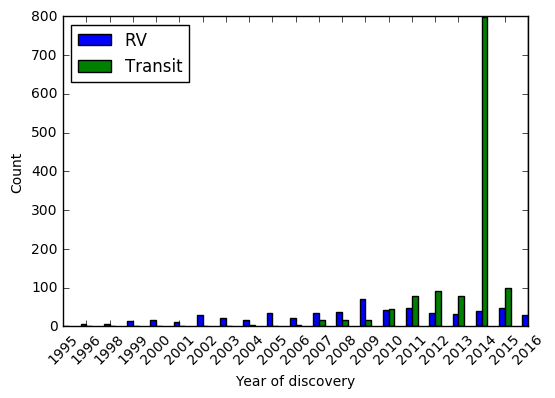

In [27]:
#create a new 2-column dataframe
df2= pd.DataFrame(df_RV['pl_disc'].value_counts(sort=False)) 
df2['Transit'] = df_transit['pl_disc'].value_counts(sort=False)
df2.columns = ['RV','Transit']

ax = df2.sort_index(axis=0).plot.bar()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylim([0,800])
#the interval [1995, 2015] can't be used since it is an array of year; 0=1989 and len(df2)=2016
ax.set_xlim([1,len(df2)-1]) 
ax.set_ylabel('Count')
ax.set_xlabel('Year of discovery')
plt.show()

In [28]:
# import seaborn as sb
# with sb.axes_style('whitegrid'):
#     ax, fig = plt.subplots(1,1,figsize=(15,3))
#     ax.hist(df_transit['pl_disc'].dropna(), bins=20)
#     ax.hist(df_RV['pl_disc'].dropna(), bins=20, alpha=0.7)
#     ax.xlabel('Year of discovery]')
#     ax.ylabel('Count')
#     ax.legend(['Transit','RV'])
#     ax.xlim([1995,2015])
#     ax.ylim([0,1000])

# 2. Look at the names of the host stars. These names usually have the form of a prefix (such as "HD") followed by a number.

### a. What are the 5 most common prefixes? If a prefix is an abbreviation, write the full name. Provide a reference for each common prefix, if you can.

In [104]:
df_RV['pl_hostname'][:][:2]=='HD'

0    False
1    False
Name: pl_hostname, dtype: bool

Divide the planets into three groups: those discovered before 2000, between 2000 and 2009, since 2009.

In [68]:
### groupA = pre-2000
idx1_RV = df_RV['pl_disc'] <2000
groupA_RV = df_RV[idx1_RV]

idx1_tr= df_transit['pl_disc'] <2000
groupA_transit = df_transit[idx1_tr]

### groupB = 2000-2008
# idx2_RV = df_RV['pl_disc'] == [2000,2008]
# groupB_RV = df_RV[idx2_RV]
##This does not work because filter is not perfect
# idx2_RV = (df_RV['pl_disc'] >= 2000 & (df_RV['pl_disc'] <= 2008))
# groupB_RV = df_RV[idx2_RV]
groupB_RV = df_RV.query('2000 <= pl_disc <= 2008')
# idx2_tr= df_transit['pl_disc'] == [2000,2008]
# groupB_transit = df_transit[idx2_tr]
##This also does not work because filter is not perfect
#idx2_tr = (df_transit['pl_disc'] >= 2000 & (df_transit['pl_disc'] <= 2008))
#groupB_transit = df_transit[idx2_tr]
groupB_transit = df_transit.query('2000 <= pl_disc <= 2008')

### groupC = post-2008 = since 2009
idx3_RV = df_RV['pl_disc'] >2008
groupC_RV = df_RV[idx3_RV]

idx3_tr= df_transit['pl_disc'] >2008
groupC_transit = df_transit[idx3_tr]

In [73]:
groupA_RV.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumblend,st_dens,st_denserr1,st_denserr2,st_denslim,st_metratio,st_age,st_ageerr1,st_ageerr2,st_agelim
1,3391,ups And,b,Radial Velocity,3,4.617033,0.000023,-0.000023,0.0,0.059222,...,0.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0.0
2,3392,ups And,c,Radial Velocity,3,241.258000,0.064000,-0.064000,0.0,0.827774,...,0.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0.0
3,3393,ups And,d,Radial Velocity,3,1276.460000,0.570000,-0.570000,0.0,2.513290,...,0.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0.0
5,3389,tau Boo,b,Radial Velocity,1,3.312457,0.000007,-0.000007,0.0,0.049000,...,0.0,NaN,NaN,NaN,NaN,[Fe/H],NaN,NaN,NaN,0.0
2706,688,HR 810,b,Radial Velocity,1,312.000000,5.000000,-5.000000,0.0,0.910000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
groupA_transit.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_lumblend,st_dens,st_denserr1,st_denserr2,st_denslim,st_metratio,st_age,st_ageerr1,st_ageerr2,st_agelim


There were no transiting planets before 2000. Let's quickly confirm that there are significantly more planets since 2009 than before then.

In [74]:
print('Number of transiting planets between 2000 and 2008: {}'.format(len(groupB_transit)))
print('Number of transiting planets since 2009: {}'.format(len(groupC_transit)))

Number of transiting planets between 2000 and 2008: 44
Number of transiting planets since 2009: 2633


Let's see the trend in RV and transiting planets in these epochs.

In [86]:
d = {'Transit' : pd.Series([len(groupA_transit), len(groupB_transit), len(groupC_transit)], index=['<2000', '2000-8', '>2008']),
     'RV' : pd.Series([len(groupA_RV), len(groupB_RV), len(groupC_RV)], index=['<2000', '2000-8', '>2008'])}
table = pd.DataFrame(d)    
table

,RV,Transit
<2000,27,0
2000-8,225,44
>2008,345,2633


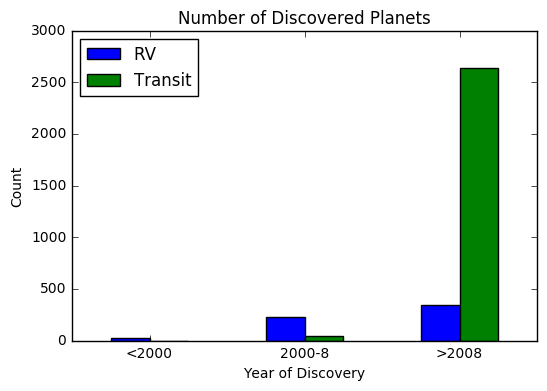

In [93]:
table.plot.bar()
plt.title('Number of Discovered Planets');
plt.xlabel('Year of Discovery')
plt.xticks(rotation=0)
plt.ylabel('Count')

In [142]:
DF1 = pd.DataFrame({'<2000': groupA_transit['st_teff'], 
                   '2000-8': groupB_transit['st_teff'], 
                   '>2009': groupC_transit['st_teff']})
DF2 = pd.DataFrame({'<2000': groupA_RV['st_teff'], 
                   '2000-8': groupB_RV['st_teff'], 
                   '>2009': groupC_RV['st_teff']})


DF1.columns.tolist()

['2000-8', '<2000', '>2009']

In [146]:
DF1 = DF1[['>2009', '2000-8', '<2000']]
DF2 = DF2[['>2009', '2000-8', '<2000']]

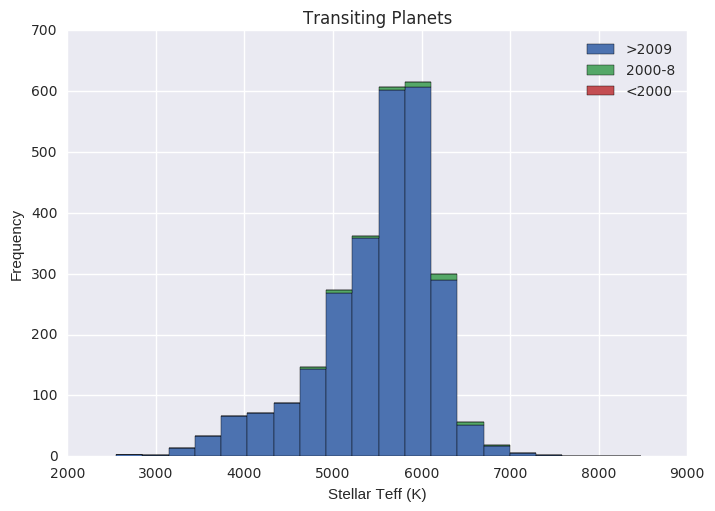

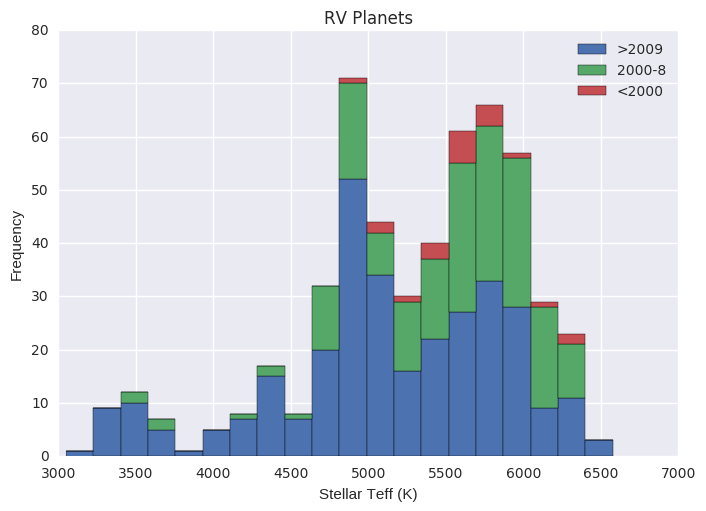

In [147]:
ax = plt.figure()
DF1.plot.hist(stacked=True, bins=20)
plt.title('Transiting Planets')
plt.xlabel('Stellar Teff (K)')
DF2.plot.hist(stacked=True, bins=20)
plt.title('RV Planets')
plt.xlabel('Stellar Teff (K)')

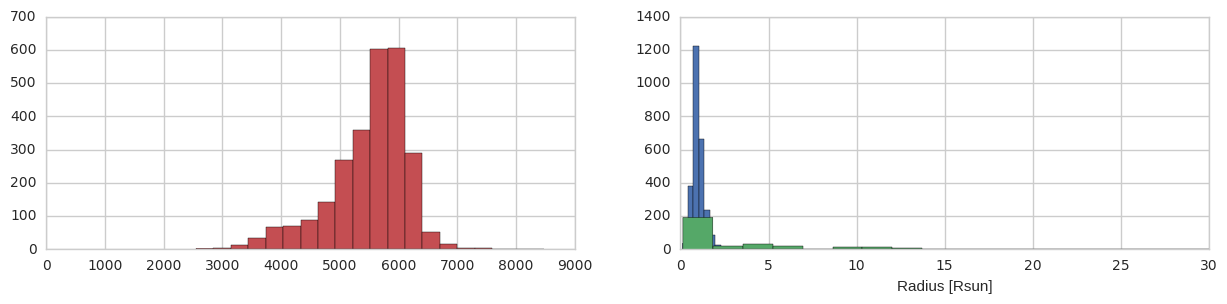

In [111]:
import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, axs = plt.subplots(1,2,figsize=(15,3))
    axs[0].hist(groupA_transit['st_teff'].dropna(), bins=20)
    axs[0].hist(groupB_transit['st_teff'].dropna(), bins=20)
    axs[0].hist(groupC_transit['st_teff'].dropna(), bins=20)
    #axs[0].hist(df_RV['st_teff'].dropna(), bins=20)
    #axs[0].set_xlabel('Teff [K]')
    #axs[0].set_ylabel('Count')
    axs[1].hist(df_transit['st_rad'].dropna(), bins=20)
    axs[1].hist(df_RV['st_rad'].dropna(), bins=30)
    axs[1].set_xlabel('Radius [Rsun]')
    axs[1].set_xlim([0,30])
    plt.show()

### b. How does the mix of these most common names change from one time period to the next?

Be specific: connect the typical properties of stars in particular catalogs to the methods used to discover planets.

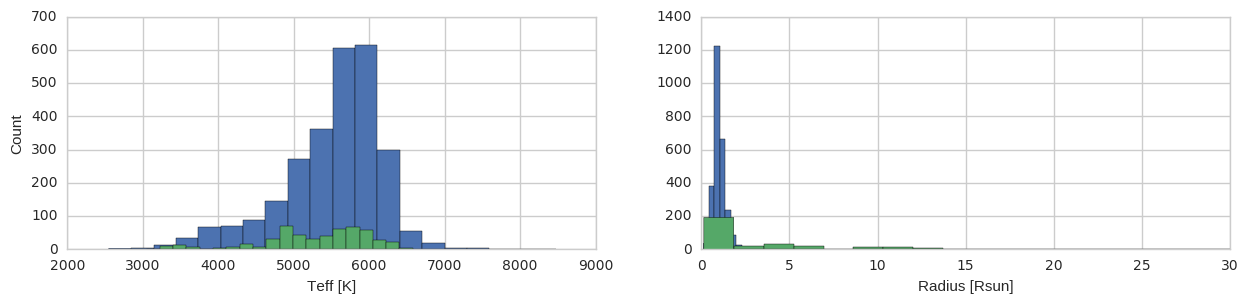

In [334]:
import seaborn as sb
with sb.axes_style('whitegrid'):
    fig, axs = plt.subplots(1,2,figsize=(15,3))
    axs[0].hist(df_transit['st_teff'].dropna(), bins=20)
    axs[0].hist(df_RV['st_teff'].dropna(), bins=20)
    axs[0].set_xlabel('Teff [K]')
    axs[0].set_ylabel('Count')
    axs[1].hist(df_transit['st_rad'].dropna(), bins=20)
    axs[1].hist(df_RV['st_rad'].dropna(), bins=30)
    axs[1].set_xlabel('Radius [Rsun]')
    axs[1].set_xlim([0,30])
    plt.show()

In [351]:
df_RV['st_sp'].max()

6.5499999999999998

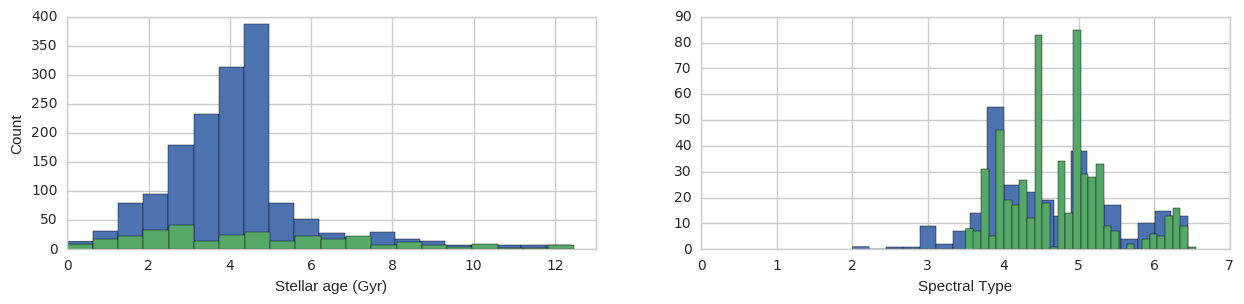

In [357]:
import seaborn as sb

sp_type=['O','B','A','F','G','K','M']

with sb.axes_style('whitegrid'):
    fig, axs = plt.subplots(1,2,figsize=(15,3))
    axs[0].hist(df_transit['st_age'].dropna(), bins=20)
    axs[0].hist(df_RV['st_age'].dropna(), bins=20)
    axs[0].set_xlabel('Stellar age (Gyr)')
    axs[0].set_ylabel('Count')
    axs[0].set_xlim([0,13])
    axs[1].hist(df_transit['st_sp'].dropna(), bins=20)
    axs[1].hist(df_RV['st_sp'].dropna(), bins=30)
    axs[1].set_xlabel('Spectral Type')
    axs[1].set_xlim([0,7])
    axs[1].set_xticks([0,7],sp_type)
    plt.show()

In [ ]:
#http://exoplanetarchive.ipac.caltech.edu/exoplanetplots/



### c. Why does the mix of names change? Be specific: connect the typical properties of stars in particular catalogs to the methods used to discover planets.

In [212]:
#Make a mass vs. semi-major axis plot of pre-2000, 2000-8, and post-2008 planets

fname1 = 'planets_pre2000.csv'
fname2 = 'planets_2000-8.csv'
fname3 = 'planets_post2008.csv'

import pandas as pd
df_a = pd.read_csv(fname1,delimiter=',')
df_a.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate,pl_disc
0,3393,ups And,b,Radial Velocity,3,4.617033,0.000023,-0.000023,0,0.059222,...,NaN,0.0,0.0,1.56,NaN,NaN,0.0,0.0,2014-05-14,1996
1,3394,ups And,c,Radial Velocity,3,241.258000,0.064000,-0.064000,0,0.827774,...,NaN,0.0,0.0,1.56,NaN,NaN,0.0,0.0,2014-05-14,1999
2,3395,ups And,d,Radial Velocity,3,1276.460000,0.570000,-0.570000,0,2.513290,...,NaN,0.0,0.0,1.56,NaN,NaN,0.0,0.0,2014-05-14,1999
3,3391,tau Boo,b,Radial Velocity,1,3.312457,0.000007,-0.000007,0,0.049000,...,-0.05,0.0,0.0,1.46,0.05,-0.05,0.0,0.0,2015-04-16,1996
4,3210,PSR B1257+12,c,Pulsar Timing,3,66.541900,0.000100,-0.000100,0,0.360000,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,2015-04-30,1992


In [140]:
df_b = pd.read_csv(fname2,delimiter=',')
df_b.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate,pl_disc
0,3396,xi Aql,b,Radial Velocity,1,136.75,0.25,-0.25,0.0,0.68,...,NaN,0.0,0.0,12.00,NaN,NaN,0.0,0.0,2014-05-14,2007
1,3383,kap CrB,b,Radial Velocity,1,1261.94,28.91,-23.97,0.0,2.80,...,-0.04,0.0,0.0,5.06,0.04,-0.04,0.0,0.0,2015-10-15,2007
2,3381,gam Cep,b,Radial Velocity,1,903.30,1.50,-1.50,0.0,2.05,...,-0.12,0.0,0.0,4.90,NaN,NaN,0.0,0.0,2014-08-27,2003
3,3379,eps Tau,b,Radial Velocity,1,594.90,5.30,-5.30,0.0,1.93,...,NaN,0.0,NaN,13.70,0.60,NaN,0.0,NaN,2014-05-14,2006
4,3378,eps Eri,b,Radial Velocity,1,2502.00,10.00,-10.00,0.0,3.39,...,-0.05,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2015-09-03,2000


In [227]:
#planets discovered pre-2000
idx1 = df_a['pl_discmethod'] == 'Transit'
dfA_tr = df_a[idx1]

#no transit before 2000

idx2 = df_a['pl_discmethod'] == 'Radial Velocity'
dfA_RV = df_a[idx2]

#dfA_RV.head()

dfA_RV_set = pd.DataFrame(dfA_RV['pl_orbsmax'].dropna())
dfA_RV_set['M'] = dfA_RV['pl_bmassj'].dropna()
dfA_RV_set.columns = ['P','M']

In [231]:
#planets discovered between 2000 and 2008
idx1 = df_b['pl_discmethod'] == 'Transit'
dfB_tr = df_b[idx1]

idx2 = df_b['pl_discmethod'] == 'Radial Velocity'
dfB_RV = df_b[idx2]

#dfB_tr.head()
#dfB_RV.head()

dfB_tr_set = pd.DataFrame(dfB_tr['pl_orbsmax'].dropna())
dfB_tr_set['M'] = dfB_tr['pl_bmassj'].dropna()
dfB_tr_set.columns = ['P','M']

dfB_RV_set = pd.DataFrame(dfB_RV['pl_orbsmax'].dropna())
dfB_RV_set['M'] = dfB_RV['pl_bmassj'].dropna()
dfB_RV_set.columns = ['P','M']

In [232]:
#planets discovered since 2009
idx1 = df_c['pl_discmethod'] == 'Transit'
dfC_tr = df_c[idx1]

idx2 = df_c['pl_discmethod'] == 'Radial Velocity'
dfC_RV = df_c[idx2]

#dfC_tr.head()
#dfC_RV.head()

dfC_tr_set = pd.DataFrame(dfC_tr['pl_orbsmax'].dropna())
dfC_tr_set['M'] = dfC_tr['pl_bmassj'].dropna()
dfC_tr_set.columns = ['P','M']

dfC_RV_set = pd.DataFrame(dfC_RV['pl_orbsmax'].dropna())
dfC_RV_set['M'] = dfC_RV['pl_bmassj'].dropna()
dfC_RV_set.columns = ['P','M']

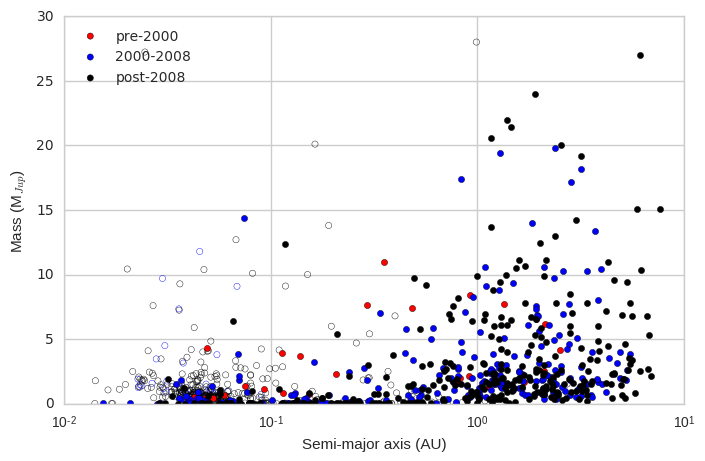

In [327]:
from matplotlib import pyplot as plt
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    ##transit-no fill
    #ax.scatter(dfA_tr_set.P.values,dfA_tr_set.M.values, edgecolor='r',facecolor='none') #no data
    ax.scatter(dfB_tr_set.P.values,dfB_tr_set.M.values, edgecolor='b',facecolor='none')
    ax.scatter(dfC_tr_set.P.values,dfC_tr_set.M.values, edgecolor='k',facecolor='none')

    ##RV-filled
    ax.scatter(dfA_RV_set.P.values,dfA_RV_set.M.values, label='pre-2000', c='r')
    ax.scatter(dfB_RV_set.P.values,dfB_RV_set.M.values, label='2000-2008', c='b')
    ax.scatter(dfC_RV_set.P.values,dfC_RV_set.M.values, label='post-2008', c='k')
    
    ax.set_ylabel('Mass (M$_{Jup}$)')
    ax.set_xlabel('Semi-major axis (AU)')
    ax.set_xscale('log')
    ax.set_ylim(0,30)
    ax.set_xlim(0.01,10)
    plt.legend(loc='upper left')
    plt.show()

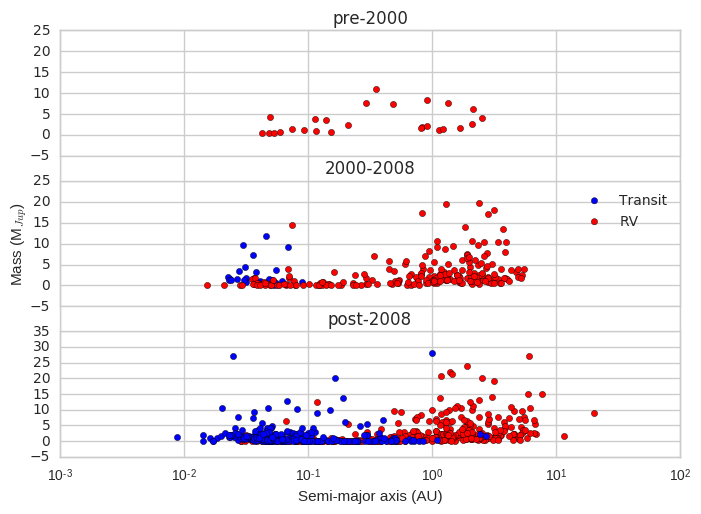

In [320]:
from matplotlib import pyplot as plt
with sb.axes_style('whitegrid'):
    ##transit-red ; Rv-blue
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylabel('Mass (M$_{Jup}$)')
    #ax.set_xlabel('Period (day)')
    #ax.set_xscale('log')
    ax.tick_params(labelbottom='off')
    ax.yaxis.labelpad = 15
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    ax1 = fig.add_subplot(311)
    #ax1.scatter(dfA_tr_set.P.values,dfA_tr_set.M.values, label='Transit', c='b')
    ax1.scatter(dfA_RV_set.P.values,dfA_RV_set.M.values, label='RV', c='r')
    ax1.tick_params(labelbottom='off')
    ax1.set_ylim(0,30)
    ax1.set_xlim(0.1,10)
    ax1.set_xscale('log')
    plt.title('pre-2000')
    
    ax2 = fig.add_subplot(312, sharex=ax1,sharey=ax1)
    ax2.scatter(dfB_tr_set.P.values,dfB_tr_set.M.values, label='Transit', c='b')
    ax2.scatter(dfB_RV_set.P.values,dfB_RV_set.M.values, label='RV', c='r')
    ax2.tick_params(labelbottom='off')
    plt.legend()
    plt.title('2000-2008')
    
    ax3 = fig.add_subplot(313, sharex=ax1)
    ax3.scatter(dfC_RV_set.P.values,dfC_RV_set.M.values, label='RV', c='r')
    ax3.scatter(dfC_tr_set.P.values,dfC_tr_set.M.values, label='Transit', c='b')
    ax3.set_xlabel('Semi-major axis (AU)')
    plt.title('post-2008')
    
    plt.show()